In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [7]:
data = pd.read_csv('E:/Kaggle/Housing Sales.csv', header = 0)
data.head()

RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2022-09-30   
1    394913         1     New York, NY        msa        NY  2022-09-30   
2    753899         2  Los Angeles, CA        msa        CA  2022-09-30   
3    394463         3      Chicago, IL        msa        IL  2022-09-30   
4    394514         4       Dallas, TX        msa        TX  2022-09-30   

   2022-10-31  2022-12-31  2023-09-30  
0         0.1         0.4         1.4  
1         0.1         0.0        -1.0  
2        -1.3        -2.0        -2.4  
3         0.2         0.3        -0.9  
4        -0.1         0.1         2.0

In [8]:
data.shape

(897, 9)

In [15]:
data.info()  #shows details of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    897 non-null    int64  
 1   SizeRank    897 non-null    int64  
 2   RegionName  897 non-null    object 
 3   RegionType  897 non-null    object 
 4   StateName   896 non-null    object 
 5   BaseDate    897 non-null    object 
 6   2022-10-31  896 non-null    float64
 7   2022-12-31  894 non-null    float64
 8   2023-09-30  897 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 63.2+ KB


In [12]:
data.describe()

RegionID    SizeRank  2022-10-31  2022-12-31  2023-09-30
count     897.000000  897.000000  896.000000  894.000000  897.000000
mean   415075.056856  453.584169    0.342746    0.692170    1.115050
std     85877.411525  265.136887    0.489159    0.954945    2.300332
min    102001.000000    0.000000   -2.300000   -3.900000   -6.400000
25%    394549.000000  225.000000    0.200000    0.300000   -0.300000
50%    394801.000000  449.000000    0.400000    0.800000    1.000000
75%    395051.000000  679.000000    0.600000    1.100000    2.600000
max    845172.000000  927.000000    3.700000    7.500000   13.200000

In [13]:
data.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
BaseDate       object
2022-10-31    float64
2022-12-31    float64
2023-09-30    float64
dtype: object

In [10]:
data.isnull().sum() #To check missing value or null value avaliable in the data

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
BaseDate      0
2022-10-31    1
2022-12-31    3
2023-09-30    0
dtype: int64

<AxesSubplot:>

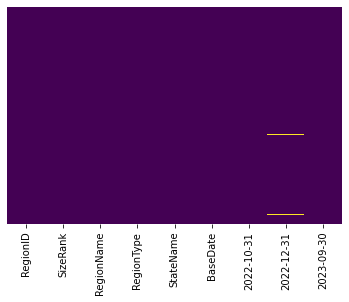

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
data.duplicated().sum()

0

In [18]:
data.groupby('RegionType').count()

RegionID  SizeRank  RegionName  StateName  BaseDate  2022-10-31  \
RegionType                                                                    
country            1         1           1          0         1           1   
msa              896       896         896        896       896         895   

            2022-12-31  2023-09-30  
RegionType                          
country              1           1  
msa                893         896

SEGREGATING THE DATA BY DATA STRUTURE
1.Numeric Data
2.Categoty Data

In [23]:
cate_col=[col for col in data.columns if data[col].dtypes=='object']

In [24]:
num_col=[col for col in data.columns if data[col].dtypes!='object']

In [26]:
data[cate_col]

RegionName RegionType StateName    BaseDate
0      United States    country       NaN  2022-09-30
1       New York, NY        msa        NY  2022-09-30
2    Los Angeles, CA        msa        CA  2022-09-30
3        Chicago, IL        msa        IL  2022-09-30
4         Dallas, TX        msa        TX  2022-09-30
..               ...        ...       ...         ...
892       Zapata, TX        msa        TX  2022-09-30
893    Ketchikan, AK        msa        AK  2022-09-30
894        Craig, CO        msa        CO  2022-09-30
895       Lamesa, TX        msa        TX  2022-09-30
896       Vernon, TX        msa        TX  2022-09-30

[897 rows x 4 columns]

In [27]:
data[num_col]

RegionID  SizeRank  2022-10-31  2022-12-31  2023-09-30
0      102001         0         0.1         0.4         1.4
1      394913         1         0.1         0.0        -1.0
2      753899         2        -1.3        -2.0        -2.4
3      394463         3         0.2         0.3        -0.9
4      394514         4        -0.1         0.1         2.0
..        ...       ...         ...         ...         ...
892    753929       923         0.6         0.6        -0.3
893    394743       924         0.3         0.1        -2.2
894    753874       925         0.5         0.5        -2.0
895    394767       926         0.1         0.4         1.1
896    395188       927         0.5         0.2        -1.4

[897 rows x 5 columns]

C:\Users\Amit Manore\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='StateName', ylabel='count'>

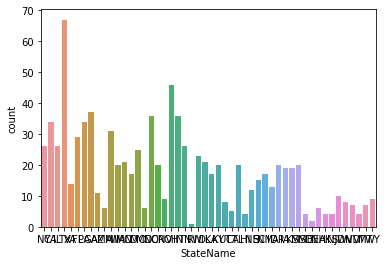

In [21]:
sns.countplot(data['StateName'])

C:\Users\Amit Manore\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RegionType', ylabel='count'>

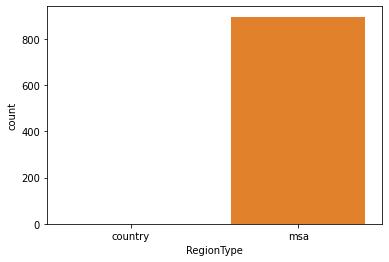

In [30]:
sns.countplot(data['RegionType'])

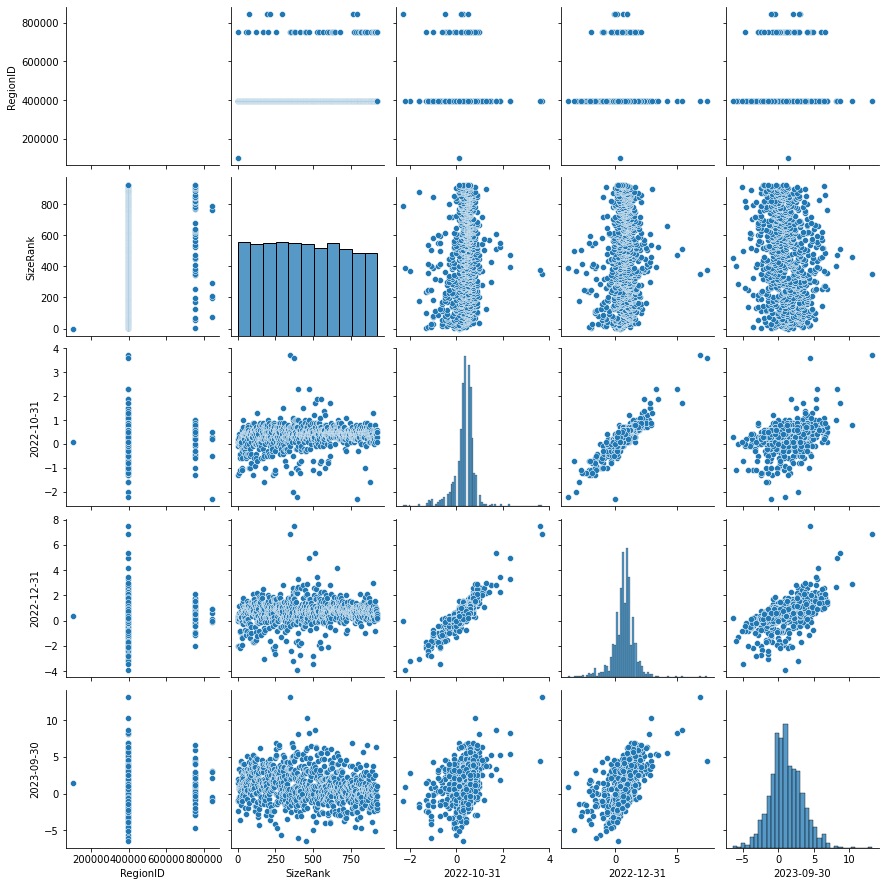

In [22]:
sns.pairplot(data=data)

In [28]:
from pandas_profiling import ProfileReport

In [29]:
profile = ProfileReport(data)
profile